<a href="https://colab.research.google.com/github/Nightmare-Kin/Bootcamp-day-1-/blob/main/Copy_of_D1C1VC_Bootcamp_Neural_Network_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to PyTorch

Harvard AI Bootcamp

## Make a copy of this notebook! Editing directly will not be saved.

This notebook introduces you to PyTorch, an open source ML framework that allows you to build neural networks. PyTorch is the most widely used framework in research and has a huge developer community. Alternatives include [TensorFlow](https://www.tensorflow.org/), [JAX](https://github.com/google/jax#quickstart-colab-in-the-cloud) and [Caffe](http://caffe.berkeleyvision.org/).

We will use a set of standard libraries that are often used in machine learning projects. If you are running this notebook on Google Colab, all libraries should be pre-installed.

BEFORE WE START!

At the top go to **Runtime** -> **Change Runtime Type** and make sure T4 GPU is selected (select it if not) and click **Save**. This will be important for later in the notebook so we don't have to restart the code.

# Format


1.   PyTorch Basics
2.   Models and Activation Functions
3.   Gradients




In [ ]:
## Standard libraries
import os
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

<ipython-input-1-47578708>:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


## The Basics of PyTorch

Let's start with importing PyTorch. The package is called `torch`, based on its original framework [Torch](http://torch.ch/). As a first step, we can check its version:

In [ ]:
import torch
print("Using torch", torch.__version__)

Using torch 2.6.0+cu124


As in every machine learning framework, PyTorch provides functions that are stochastic like generating random numbers. However, a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below.

In [ ]:
torch.manual_seed(42) # Setting the seed

### Tensors

Tensors are the PyTorch equivalent to Numpy arrays, with the addition to also have support for GPU acceleration (more on that later).

The name "tensor" is a generalization of familiar concepts. A vector is a 1-D tensor; a matrix a 2-D tensor.

Most common functions from numpy can be used on tensors. Since numpy arrays are so similar to tensors, we can convert most tensors to numpy arrays (and back).

#### Initialization

Let's first start by looking at different ways of creating a tensor. There are many possible options, the simplest one is to call `torch.Tensor` passing the desired shape as input argument:

In [ ]:
# Create a 3-dimensional tensor with dimensions 2x3x4
# torch.Tensor takes as input the dimensions of the desired tensor, and outputs an allocated tensor object. torch.Tensor(2,2) creates a 2-D square tensor.
# Print the tensor

# TODO
x = torch.Tensor(2,3,4)
print(x)

tensor([[[-1.6886e-18,  4.5219e-41, -1.6898e-18,  4.5219e-41],
         [-1.6880e-18,  4.5219e-41, -2.2323e-09,  4.5219e-41],
         [-1.6925e-18,  4.5219e-41,  1.1433e+20,  4.5219e-41]],

        [[-1.6901e-18,  4.5219e-41, -4.8176e-09,  4.5219e-41],
         [-1.6901e-18,  4.5219e-41, -1.6878e-18,  4.5219e-41],
         [ 1.7347e+20,  4.5219e-41, -1.6878e-18,  4.5219e-41]]])


`torch.Tensor` allocates memory for the desired tensor, but reuses any values that have already been in the memory (hence the random numbers printed). To directly assign values to the tensor during initialization, there are many alternatives including:

* `torch.zeros`: Creates a tensor filled with zeros
* `torch.ones`: Creates a tensor filled with ones
* `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
* `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
* `torch.arange`: Creates a tensor containing the values $N,N+1,N+2,...,M$
* `torch.Tensor` (input list): Creates a tensor from the list elements you provide

In [ ]:
# TODO: Create a zero-valued tensor with 6 by 6 dimensions
x = torch.zeros(6,6)
print(x)

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])


In [ ]:
# Create a tensor equivalent to
# [[1, 2],
#  [3, 4]]
# TODO
x = torch.Tensor([[1,2],[3,4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
# TODO: Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2,3,4)
print(x)

tensor([[[0.6612, 0.5366, 0.7784, 0.4935],
         [0.7485, 0.4066, 0.5543, 0.7722],
         [0.6238, 0.6195, 0.8319, 0.5912]],

        [[0.4096, 0.9754, 0.5603, 0.7539],
         [0.2692, 0.4237, 0.4051, 0.8292],
         [0.8139, 0.5738, 0.4099, 0.8047]]])


### GPU support

A crucial feature of PyTorch is the support of GPUs, short for Graphics Processing Unit. A GPU can perform many thousands of small operations in parallel, making it very well suitable for performing large matrix operations in neural networks. When comparing GPUs to CPUs, we can list the following main differences (credit: [Kevin Krewell, 2009](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/))

<center style="width: 100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/comparison_CPU_GPU.png?raw=1" width="700px"></center>

GPUs can accelerate the training of your network up to a factor of $100$ which is essential for large neural networks. PyTorch implements a lot of functionality for supporting GPUs (mostly those of NVIDIA due to the libraries [CUDA](https://developer.nvidia.com/cuda-zone) and [cuDNN](https://developer.nvidia.com/cudnn)). First, let's check whether you have a GPU available:

In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


Now let's create a tensor and push it to the device:

In [ ]:
x = torch.zeros(2, 3, device=device)
x = x.to(device) # same thing
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [ ]:
x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 2.41226s
GPU time: 0.08761s


Depending on the size of the operation and the CPU/GPU in your system, the speedup of this operation can be >50x.

In [ ]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Loss Functions — How a Network Learns *Anything*

A **loss function** (sometimes called a cost or objective) turns the model’s raw
predictions  into a single number that expresses “how bad” they are.
During training we *minimise* this number, nudging the network’s parameters so
future predictions move closer to the targets.

PyTorch ships with dozens of ready-made loss modules (`torch.nn.*Loss`), but in
practice a small handful covers the vast majority of problems:

| Task type | Typical loss | Shape of penalty |
|-----------|--------------|------------------|
| **Regression** (predicting a real value) | *Mean-Squared Error* (MSE) | Quadratic: stronger penalty for large errors |
| | *Mean-Absolute Error* (MAE / L1) | Linear: treats all errors proportionally |
| | *Huber* (“Smooth L1”) | Quadratic when error is small, linear when large (robust to outliers) |
| **Binary classification** | *Binary Cross-Entropy with Logits* (BCEWithLogits) | Steeply punishes confident wrong predictions |
| **Multi-class classification** | *Cross-Entropy* | Same idea as BCE but for 2 + classes |

> **Why so many?**  
> Different losses encode different assumptions.  
> • MSE assumes Gaussian noise and discourages large deviations harshly.  
> • MAE is *robust*: one big outlier won’t dominate the gradient.  
> • Cross-entropy lines up perfectly with maximum-likelihood estimation for
> categorical targets and delivers well-behaved gradients near 0 / 1.

### Common regression losses (math)

$$
L_{\text{MSE}}(\hat{y},y)=\frac{1}{N}\sum_{i=1}^{N}(\hat{y}_i-y_i)^2
$$

$$
L_{\text{MAE}}(\hat{y},y)=\frac{1}{N}\sum_{i=1}^{N}\left|\,\hat{y}_i-y_i\,\right|
$$

$$
L_{\text{Huber}}^{(\delta)}(\hat{y},y)=\frac{1}{N}\sum_{i=1}^{N}
\begin{cases}
\dfrac{1}{2}\,(\hat{y}_i-y_i)^2 & \text{if } \left|\,\hat{y}_i-y_i\,\right|\le\delta,\\[6pt]
\delta\left|\,\hat{y}_i-y_i\,\right|-\dfrac{1}{2}\,\delta^{2} & \text{otherwise.}
\end{cases}
$$

---

### ✏️ Your turn – implement the losses

Complete the two TODOs below. Note that the equations above show loss averaged over all errors in a vector of predictions; however, the examples below ask you to compute element-level loss (*before* averaging). The `huber` implementation is given as an example.

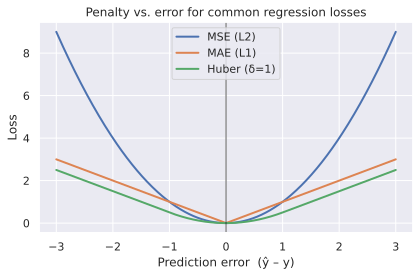

In [ ]:
# The following vector stores the errors, y^hat_i - y_i, for each data point
errors = torch.linspace(-3, 3, steps=400)      # prediction - target

# Here's an example of how you would compute element-level Huber error
huber = torch.where(errors.abs() < 1, 0.5 * errors**2, errors.abs() - 0.5)

# TODO: Compute element-level MSE
mse = errors**2

# TODO: Compute element-level MAE
mae = errors.abs()

plt.figure(figsize=(6, 4), dpi=120)
plt.plot(errors, mse, label='MSE (L2)', lw=2)
plt.plot(errors, mae, label='MAE (L1)', lw=2)
plt.plot(errors, huber, label='Huber (δ=1)', lw=2)
plt.axvline(0, color='k', lw=.7)
plt.title('Penalty vs. error for common regression losses')
plt.xlabel('Prediction error  (ŷ – y)')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

## Example: Continuous XOR


Given two binary inputs $x_1$ and $x_2$, the label to predict is $1$ if either $x_1$ or $x_2$ is $1$ while the other is $0$, or the label is $0$ in all other cases.

The example became famous by the fact that a single neuron, i.e. a linear classifier, cannot learn this simple function.

Hence, we will learn how to build a small neural network that can learn this function.

To make it a little bit more interesting, we move the XOR into continuous space and introduce some gaussian noise on the binary inputs. Our desired separation of an XOR dataset could look as follows:

<center style="width: 100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/continuous_xor.svg?raw=1" width="350px"></center>

### The model

The package `torch.nn` defines a series of useful classes like linear networks layers, activation functions, loss functions etc.

In [ ]:
import torch.nn as nn

In [ ]:
import torch.nn.functional as F

#### nn.Module

In PyTorch, a neural network is built up out of modules. Modules can contain other modules, and a neural network is considered to be a module itself as well. The basic template of a module is as follows:



```
class MyModule(nn.Module):

    def __init__(self):
        super().__init__()
        # TODO: Some init for my module

    def forward(self, x):
        # TODO: perform the calculation of the module.
        pass
```



The forward function is where the computation of the module is taken place, and is executed when you call the module (`nn = MyModule(); nn(x)`).

#### Simple classifier
We can now make use of the pre-defined modules in the `torch.nn` package, and define our own small neural network. We will implement a minimal network with a input layer, one hidden layer with tanh as activation function, and a output layer according to the following graph.

<center width="100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/small_neural_network.svg?raw=1" width="300px"></center>

The input neurons are shown in blue, which represent the coordinates $x_1$ and $x_2$ of a data point. The hidden neurons including a tanh activation are shown in white, and the output neuron in red.
In PyTorch, we can define this as follows:

In [ ]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        # TODO
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction

        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)

        return x


For the examples in this notebook, we will use a tiny neural network with two input neurons and four hidden neurons. As we perform binary classification, we will use a single output neuron.

In [ ]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [ ]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


### The data

In [ ]:
import torch.utils.data as data

#### The dataset class

The dataset class summarizes the basic functionality of a dataset in a natural way. To define a dataset in PyTorch, we simply specify two functions: `__getitem__`, and `__len__`. The get-item function has to return the $i$-th data point in the dataset, while the len function returns the size of the dataset.

In [ ]:
class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [ ]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([-0.1005,  0.0138]), tensor(0))


In [ ]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

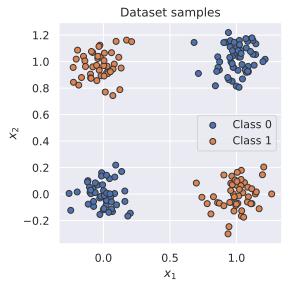

In [ ]:
visualize_samples(dataset.data, dataset.label)
plt.show()

#### The data loader class

The data loader communicates with the dataset using the function `__getitem__`, and stacks its outputs as tensors over the first dimension to form a batch.


* `batch_size`: Number of samples to stack per batch
* `shuffle`: If True, the data is returned in a random order. This is important during training for introducing stochasticity.

In [ ]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [ ]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[ 0.0325,  0.9093],
        [ 1.0190,  0.8059],
        [ 1.0342,  1.0614],
        [-0.0130,  0.1614],
        [ 0.7399, -0.0239],
        [ 0.1331,  0.9512],
        [ 0.0065, -0.0117],
        [-0.0177,  0.8931]])
Data labels torch.Size([8]) 
 tensor([1, 0, 0, 0, 1, 1, 0, 1])


### Optimization

After defining the model and the dataset, it is time to prepare the optimization of the model. During training, we will perform the following steps:

1. Get a batch from the data loader
2. Obtain the predictions from the model for the batch
3. Calculate the loss based on the difference between predictions and labels
4. Backpropagation: calculate the gradients for every parameter with respect to the loss
5. Update the parameters of the model in the direction of the gradients

We have seen how we can do step 1, 2 and 4 in PyTorch. Now, we will look at step 3 and 5.

#### Loss modules

We can calculate the loss for a batch by simply performing a few tensor operations as those are automatically added to the computation graph. For instance, for binary classification, we can use Binary Cross Entropy (BCE) which is defined as follows:

$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

where $y$ are our labels, and $x$ our predictions, both in the range of $[0,1]$.

In [ ]:
loss_module = nn.BCEWithLogitsLoss()

#### Stochastic Gradient Descent

Stochastic Gradient Descent updates parameters by multiplying the gradients with a small constant, called learning rate, and subtracting those from the parameters (hence minimizing the loss). Therefore, we slowly move towards the direction of minimizing the loss.

In [ ]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

The optimizer provides two useful functions: `optimizer.step()`, and `optimizer.zero_grad()`.

The step function updates the parameters based on the gradients as explained above. The function `optimizer.zero_grad()` sets the gradients of all parameters to zero. If we call the `backward` function on the loss while the parameter gradients are non-zero from the previous batch, the new gradients would actually be added to the previous ones instead of overwriting them.

This is done because a parameter might occur multiple times in a computation graph, and we need to sum the gradients in this case instead of replacing them. Hence, remember to call `optimizer.zero_grad()` before calculating the gradients of a batch.

### Training

In [ ]:
train_dataset = XORDataset(size=2500)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [ ]:
# Push model to device. Has to be only done once
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (activation): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()

In [ ]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

#### Saving a model

After finish training a model, we save the model to disk so that we can load the same weights at a later time. For this, we extract the so-called `state_dict` from the model which contains all learnable parameters. For our simple model, the state dict contains the following entries:

In [ ]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[ 0.5247,  0.4163],
        [-3.3803,  2.8931],
        [ 2.7724, -3.2045],
        [ 1.2516,  1.2059]], device='cuda:0')), ('linear1.bias', tensor([ 0.3338, -1.3090, -1.2688,  0.3188], device='cuda:0')), ('linear2.weight', tensor([[0.5733, 4.4948, 4.5449, 2.2356]], device='cuda:0')), ('linear2.bias', tensor([1.9830], device='cuda:0'))])


In [ ]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")

In [ ]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[ 0.5247,  0.4163],
        [-3.3803,  2.8931],
        [ 2.7724, -3.2045],
        [ 1.2516,  1.2059]], device='cuda:0')), ('linear1.bias', tensor([ 0.3338, -1.3090, -1.2688,  0.3188], device='cuda:0')), ('linear2.weight', tensor([[0.5733, 4.4948, 4.5449, 2.2356]], device='cuda:0')), ('linear2.bias', tensor([1.9830], device='cuda:0'))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[ 0.5247,  0.4163],
        [-3.3803,  2.8931],
        [ 2.7724, -3.2045],
        [ 1.2516,  1.2059]])), ('linear1.bias', tensor([ 0.3338, -1.3090, -1.2688,  0.3188])), ('linear2.weight', tensor([[0.5733, 4.4948, 4.5449, 2.2356]])), ('linear2.bias', tensor([1.9830]))])


A detailed tutorial on saving and loading models in PyTorch can be found [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

### Evaluation

Once we have trained a model, it is time to evaluate it on a held-out test set. As our dataset consist of randomly generated data points, we need to first create a test set with a corresponding data loader.

In [ ]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

As metric, we will use accuracy which is calculated as follows:

$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives.

In [ ]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.

    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:

            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1

            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [ ]:
eval_model(model, test_data_loader)

Accuracy of the model: 100.00%


If we trained our model correctly, we should see a score close to 100% accuracy. However, this is only possible because of our simple task, and unfortunately, we usually don't get such high scores on test sets of more complex tasks.

#### Visualizing classification boundaries

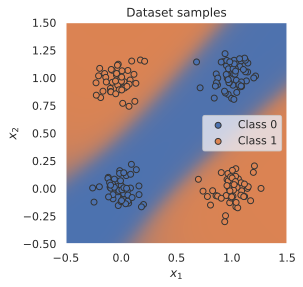

In [ ]:
@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()

### Optional: Activation Functions

After implementing and visualizing the activation functions, we are aiming to gain insights into their effect.
We do this by using a simple neural network trained on [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) and examine various aspects of the model, including the performance and gradient flow.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
# Transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, activation_func=nn.ReLU()):
        super(SimpleNN, self).__init__()
        self.linear1 = nn.Linear(784, 128)
        self.activation = activation_func
        self.linear2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.activation(self.linear1(x))
        x = self.activation(self.linear2(x))
        x = self.output(x)
        return x

Train the network on the activation functions, and plot the loss.

In [ ]:
def train_network(activation_func):
    # TODO: initalize the model, set the criterion and optimizer

    epochs = 5
    loss_history = []

    for e in tqdm(range(epochs)):
        running_loss = 0
        for images, labels in trainloader:
            optimizer.zero_grad()

            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        loss_history.append(running_loss/len(trainloader))

    plt.plot(loss_history, label=activation_func.__class__.__name__)

# Train and visualize for different activation functions
train_network(nn.Sigmoid())
train_network(nn.ReLU())
train_network(nn.Tanh())

plt.title('Training Loss with Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Optional: Practice with Gradients

Recall that a gradient is an operator and retains the dimension of the vector-valued function it is given. Given the function $f(x)=x^2+y^2+3$, compute the gradient of $f$ at the point (1, 2).

Answer: (2, 4)

Gradient Descent Exercise:

In [ ]:
# TODO

def f(x):
    return

def gradient_f(x):
    return

def gradient_descent(starting_point, learning_rate, num_iterations):
    x =
    for i in range(num_iterations):
      ...
    return x

# Example usage
minimum = gradient_descent(starting_point=0, learning_rate=0.1, num_iterations=100)
print("Minimum of f(x) found at x =", minimum)


### Optional Dynamic Computation Graph and Backpropagation

We can automatically get **gradients/derivatives** of functions that we define.

Given an input $\mathbf{x}$, we define our function by **manipulating** that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a **computational graph**. This graph shows how to arrive at our output from our input.

The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.

In [ ]:
x = torch.ones((3,))
print(x.requires_grad)

In [ ]:
x.requires_grad_(True)
print(x.requires_grad)

In order to get familiar with the concept of a computation graph, we will create one for the following function:

$$y = \frac{1}{\ell(x)}\sum_i \left[(x_i + 2)^2 + 3\right],$$

where we use $\ell(x)$ to denote the number of elements in $x$. In other words, we are taking a mean over the operation within the sum. You could imagine that $x$ are our parameters, and we want to optimize (either maximize or minimize) the output $y$. For this, we want to obtain the gradients $\partial y / \partial \mathbf{x}$. For our example, we'll use $\mathbf{x}=[0,1,2]$ as our input.

In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

Now let's build the computation graph step by step. Below is a visualization of the graph:
$x$ and $2$ are the base-value inputs. $a$ performs the addition $x+2$. $b$ squares $a$, and so on. The graph is a way to represent this formula: nodes are operations and edges represent information flow dependencies.

<center style="width: 100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/pytorch_computation_graph.svg?raw=1" width="200px"></center>

In [ ]:
# Build the computational graph for our above function.
# Ex: m = n * 2 creates a node m that doubles the output value of node n.
#TODO
a =
b =
c =
y =
print("Y", y)

We calculate $a$ based on the inputs $x$ and the constant $2$, $b$ is $a$ squared, and so on. We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:

In [ ]:
y.backward()

`x.grad` will now contain the gradient $\partial y/ \partial \mathcal{x}$, and this gradient indicates how a change in $\mathbf{x}$ will affect output $y$ given the current input $\mathbf{x}=[0,1,2]$:

In [ ]:
print(x.grad)